In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

In [2]:
data = pd.read_csv('Insurance_train.csv')
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
data.shape

(58592, 44)

### Univariate Analysis:

In [3]:
num = data.select_dtypes(include=np.number).columns
num = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density',  'displacement', 
        'turning_radius', 'length', 'width', 'height',
       'gross_weight']

In [4]:
len(num)

10

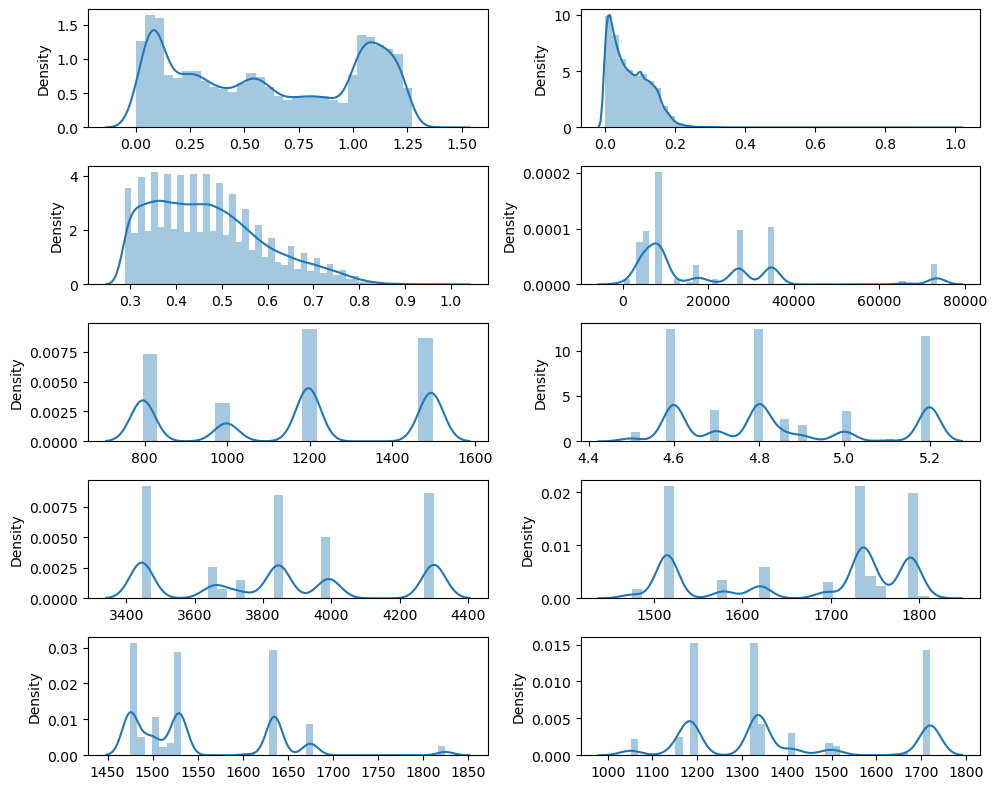

In [5]:
nrows = 5
ncols = 2
iterator = 1
plt.figure(figsize=(10,8))
for i in num:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(x=data[i])
    iterator+=1
    
plt.tight_layout()
plt.show()

* ***Inferences***
* 

In [6]:
cat = data.select_dtypes(exclude=np.number).columns
cat = ['area_cluster', 'segment', 'model', 'fuel_type',
        'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','make','cylinder','airbags',
       'is_claim','ncap_rating']


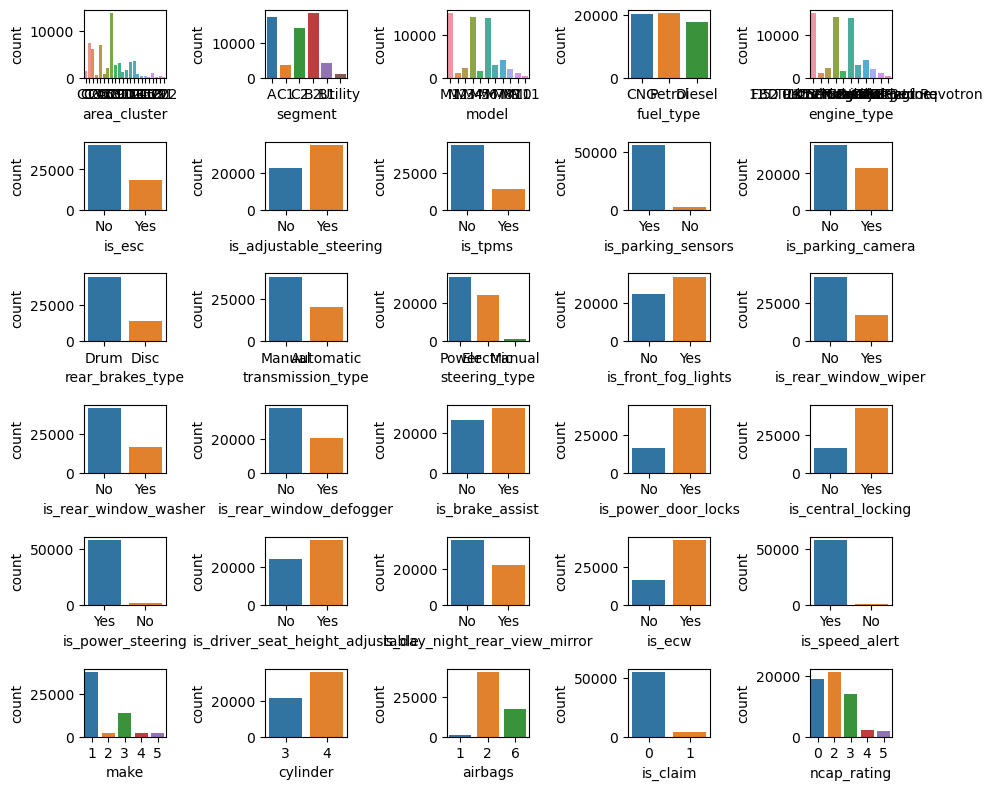

In [7]:
nrows = 6
ncols = 5
iterator = 1

plt.figure(figsize=(10,8))
for i in cat:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(x = data[i])
    iterator +=1
plt.tight_layout()
plt.show()

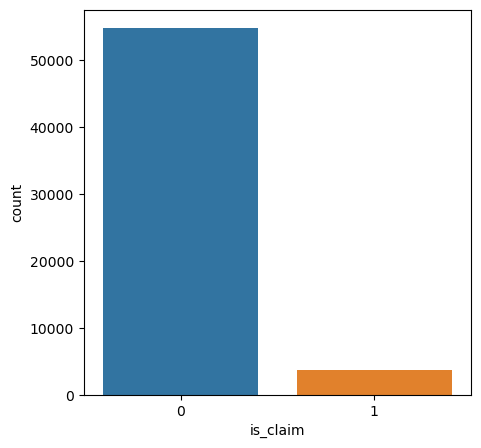

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['is_claim']);


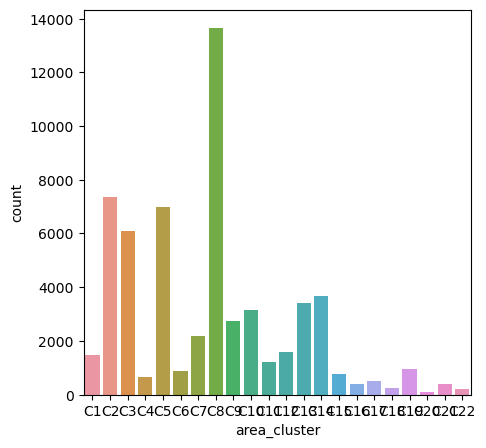

In [9]:
plt.figure(figsize=(5,5))

sns.countplot(x=data['area_cluster']);
## top 3 clusters are C8,C5,C3 most likely....

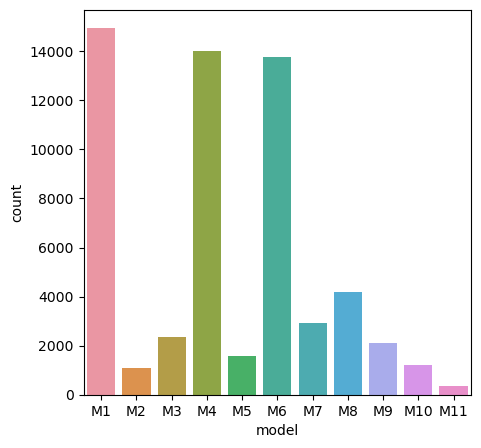

In [10]:
plt.figure(figsize=(5,5))

sns.countplot(x=data['model']);
# TOP 3 MODEL CARS ARE M1,M4 and M6

In [11]:
data.model.value_counts(ascending=False)[:3].index

Index(['M1', 'M4', 'M6'], dtype='object')

In [12]:
data.segment.value_counts(ascending=False)[:3].index

Index(['B2', 'A', 'C2'], dtype='object')

In [13]:
data.engine_type.value_counts()[:3].index

Index(['F8D Petrol Engine', '1.5 L U2 CRDi', 'K Series Dual jet'], dtype='object')

In [14]:
data.ncap_rating.value_counts()[:3].index

Int64Index([2, 0, 3], dtype='int64')

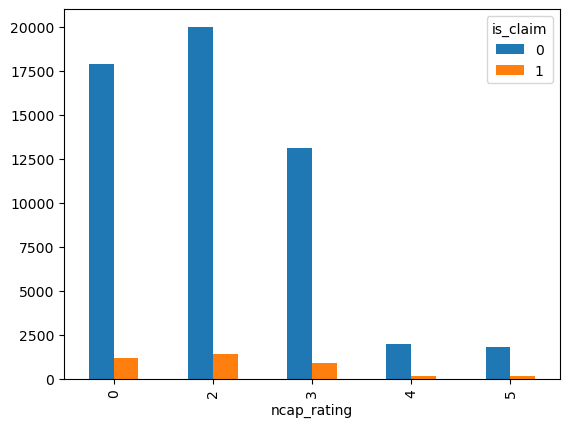

In [15]:
pd.crosstab(data.ncap_rating,data.is_claim).plot(kind='bar');
# Lower the ncap more chances of a claim coming to insurance compamny

In [16]:
# missing Values 
data.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [17]:
torque = []
for i in data.max_torque:
    torque.append(i.split('Nm')[0])
    

In [18]:
data['Nm'] = pd.to_numeric(pd.Series(torque))

In [19]:
rpm = []
for i in data['max_torque']:
    rpm.append(i.split('@')[1].split('rpm')[0])
    
data['rpm'] = pd.to_numeric(pd.Series(rpm))

In [20]:
bhp = []
for i in data['max_power']:
    bhp.append(i.split('bhp')[0])
    
data['bhp'] = pd.to_numeric(pd.Series(bhp))

In [21]:
rpm = []
for i in data['max_power']:
    rpm.append(i.split('@')[1].split('rpm')[0])
    
data['rpm_power'] = pd.to_numeric(pd.Series(rpm))

In [22]:
cols = ['is_esc','is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']
labels= {'Yes':1,'No':0}

for i in cols:
    data.loc[:,i] = data.loc[:,i].map(labels)

In [23]:
data.drop(['policy_id','max_power','max_torque'],axis=1,inplace=True)

In [24]:
def engine(x):
    if x <= 1000:
        return('small_engine')
    elif x <=1200:
        return('med_engine')
    else:
        return('High_Power_engine')
data['disp_bin'] = data.displacement.apply(engine)

In [25]:
data.drop('engine_type',axis=1,inplace=True)

In [26]:
data.area_cluster.unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [27]:
area = ['C1', 'C3', 'C4', 'C6', 'C7', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22']

def areas(x):
    if x in area:
        return('Others')
    else:
        return(x)
    
data['area_cluster'] = data.area_cluster.apply(areas)

In [28]:
data.model.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [29]:
model = ['M2', 'M3','M5', 'M7', 'M8', 'M9', 'M10', 'M11']

def models(x):
    if x in model:
        return('Others')
    else:
        return(x)
    
data.model = data.model.apply(models)

In [30]:
data.segment.unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [31]:
segment = [ 'C1', 'B1', 'Utility']

def seg(x):
    if x in segment:
        return('Others')
    else:
        return(x)
    
data.segment = data.segment.apply(seg)

In [32]:
dummy = pd.get_dummies(data,drop_first=True)

In [33]:
x = dummy.drop('is_claim',axis=1)
y = dummy['is_claim']

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()
gnb = GaussianNB()

pred_train_lg = logreg.fit(xtrain,ytrain).predict(xtrain)
pred_test_lg = logreg.fit(xtrain,ytrain).predict(xtest)

pred_train_gnb = gnb.fit(xtrain,ytrain).predict(xtrain)
pred_test_gnb = gnb.fit(xtrain,ytrain).predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score,classification_report
print('Logreg Train Acc:',accuracy_score(ytrain,pred_train_lg))
print('Logreg Test Acc:',accuracy_score(ytest,pred_test_lg))


print('GNB Train Acc:',accuracy_score(ytrain,pred_train_gnb))
print('GNB Test Acc:',accuracy_score(ytest,pred_test_gnb))

Logreg Train Acc: 0.9351225652294498
Logreg Test Acc: 0.939670620360099
GNB Train Acc: 0.9351225652294498
GNB Test Acc: 0.939670620360099


In [40]:
# metrics for logistic regression
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ytest,pred_test_lg)

array([[11012,     0],
       [  707,     0]], dtype=int64)

In [41]:
print(classification_report(ytest,pred_test_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11012
           1       0.00      0.00      0.00       707

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



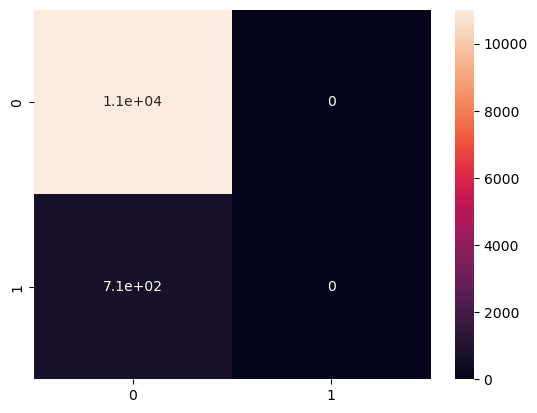

In [42]:
from sklearn.metrics import confusion_matrix,f1_score
sns.heatmap(confusion_matrix(ytest,pred_test_lg),annot=True);


In [44]:
print('f1 Score:',f1_score(ytest,pred_test_lg))

f1 Score: 0.0


[[11012     0]
 [  707     0]]
[[43832     0]
 [ 3041     0]]


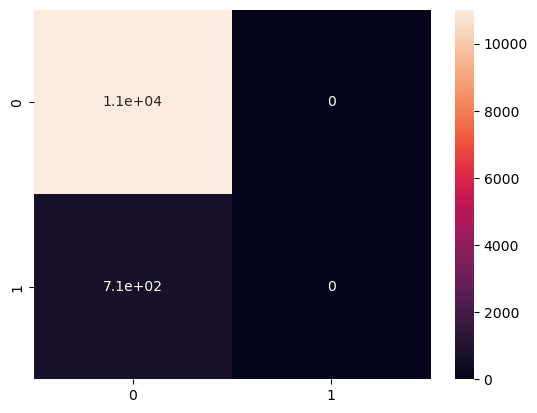

In [51]:
print(confusion_matrix(ytest,pred_test_gnb))
print(confusion_matrix(ytrain,pred_train_gnb))
sns.heatmap(confusion_matrix(ytest,pred_test_gnb),annot=True);


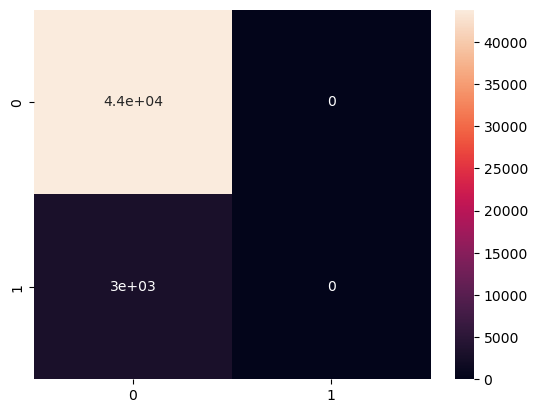

In [52]:
sns.heatmap(confusion_matrix(ytrain,pred_train_gnb),annot=True);


In [46]:
print(classification_report(ytest,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11012
           1       0.00      0.00      0.00       707

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



In [49]:
print(f1_score(ytest,pred_test_gnb))
print(f1_score(ytrain,pred_train_gnb))

0.0
0.0


## SMOTE - Handling Imbalanced Dataset

* synthetic Minority Oversampling Technique - This is an oversampling technique stratergy.

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(sampling_strategy='minority',random_state=0)


In [55]:
# recreate the new samples

x_resampled,y_resampled = smote.fit_resample(x,y)
print('Y',y.value_counts())
print('Y_SMOTE',y_resampled.value_counts())


Y 0    54844
1     3748
Name: is_claim, dtype: int64
Y_SMOTE 0    54844
1    54844
Name: is_claim, dtype: int64


In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x_resampled,y_resampled,test_size=0.20,random_state=42)

lg = LogisticRegression()

pred_lg = lg.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred_lg))

              precision    recall  f1-score   support

           0       0.53      0.40      0.45     11092
           1       0.51      0.64      0.56     10846

    accuracy                           0.51     21938
   macro avg       0.52      0.52      0.51     21938
weighted avg       0.52      0.51      0.51     21938



In [58]:
pred_gnb = gnb.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ytest,pred_gnb))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54     11092
           1       0.54      0.58      0.56     10846

    accuracy                           0.55     21938
   macro avg       0.55      0.55      0.55     21938
weighted avg       0.55      0.55      0.55     21938



In [59]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3,random_state=123)

pred_dt = dtree.fit(xtrain,ytrain).predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60     11092
           1       0.61      0.73      0.66     10846

    accuracy                           0.64     21938
   macro avg       0.64      0.64      0.63     21938
weighted avg       0.64      0.64      0.63     21938



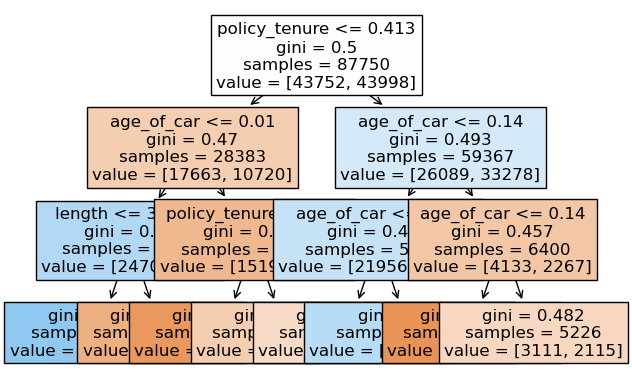

In [60]:
from sklearn.tree import plot_tree

output = plot_tree(dtree,feature_names=xtrain.columns,filled=True,fontsize
                   =12)



In [61]:
params = [{'max_depth':[3,5,7,9,11,14,15,20],
          'max_features':[None,'sqrt','auto'],
          'min_samples_split':[5000,10000,12000,15000]}]

In [62]:
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier(random_state=123)
search = RandomizedSearchCV(estimator=tree,
                            param_distributions=params,cv=5,random_state=123,
                           scoring='recall')

In [63]:
model = search.fit(x_resampled,y_resampled)

In [64]:
model.best_params_

{'min_samples_split': 5000, 'max_features': None, 'max_depth': 14}

In [65]:
dtree = DecisionTreeClassifier(min_samples_split=5000,max_depth=14,random_state=123)

pred = dtree.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     11092
           1       0.74      0.80      0.77     10846

    accuracy                           0.76     21938
   macro avg       0.76      0.76      0.76     21938
weighted avg       0.76      0.76      0.76     21938



In [66]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytest,pred)

0.5246762142376129

In [67]:
# kappa score is 52% which means model is good model.........

In [68]:

pred = dtree.fit(x,y).predict(x)

#print(classification_report(y, pred))
print(cohen_kappa_score(y, pred))

0.003953455442785692


In [69]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

pred = gnb.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54     11092
           1       0.54      0.58      0.56     10846

    accuracy                           0.55     21938
   macro avg       0.55      0.55      0.55     21938
weighted avg       0.55      0.55      0.55     21938



### KNN 

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [71]:
range_k = range(1,25)

k_scores = []
for i in range_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,xtrain,ytrain,scoring='recall',cv=10)
    k_scores.append(scores)

KeyboardInterrupt: 

Text(0, 0.5, 'Recall')

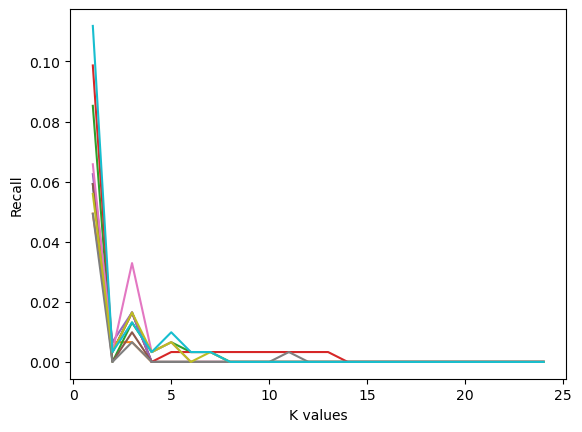

In [112]:
plt.plot(range_k,k_scores)
plt.xlabel('K values')
plt.ylabel('Recall')

## AdaBoost

In [72]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [73]:
adb = AdaBoostClassifier()
pred = adb.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71     11092
           1       0.70      0.75      0.73     10846

    accuracy                           0.72     21938
   macro avg       0.72      0.72      0.72     21938
weighted avg       0.72      0.72      0.72     21938



In [74]:
rf = RandomForestClassifier(n_estimators=200,max_depth=5)
pred = rf.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65     11092
           1       0.64      0.75      0.69     10846

    accuracy                           0.67     21938
   macro avg       0.67      0.67      0.67     21938
weighted avg       0.68      0.67      0.67     21938



In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300,max_depth=10,gamma=2)
pred = xgb.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11092
           1       0.98      0.88      0.93     10846

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938



In [79]:
import pickle
with open('Insurance.pkl', 'wb') as file:
    pickle.dump(xgb, file)

print("Model saved as 'Insurance.pkl'")

Model saved as 'Insurance.pkl'


In [81]:
# Load your trained model
with open('Insurance.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [82]:
xtrain.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'Nm', 'rpm', 'bhp',
       'rpm_power', 'area_cluster_C5', 'area_cluster_C8',
       'area_cluster_Others', 'segment_B2', 'segment_C2', 'segment_Others',
       'model_M4', 'model_M6', 'model_Others', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Manual', 'steering_type

In [83]:
def predict_target(policy_tenure,age_of_car,age_of_policyholder,
       population_density, make, airbags, is_esc,
       is_adjustable_steering, is_tpms, is_parking_sensors,
       is_parking_camera, displacement, cylinder, gear_box,
       turning_radius, length, width, height, gross_weight,
       is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer,
       is_rear_window_defogger, is_brake_assist, is_power_door_locks,
       is_central_locking, is_power_steering,
       is_driver_seat_height_adjustable, is_day_night_rear_view_mirror,
       is_ecw, is_speed_alert, ncap_rating, Nm, rpm, bhp,
       rpm_power,area_cluster_C5, area_cluster_C8,
       area_cluster_Others, segment_B2, segment_C2, segment_Others,
       model_M4, model_M6, model_Others, fuel_type_Diesel,
       fuel_type_Petrol, rear_brakes_type_Drum,transmission_type_Manual,
       steering_type_Manual, steering_type_Power,disp_bin_med_engine,
       disp_bin_small_engine):
    
    # Prepare the input data in the same format as your training data
    input_data = [[policy_tenure,age_of_car,age_of_policyholder,
       population_density, make, airbags, is_esc,
       is_adjustable_steering, is_tpms, is_parking_sensors,
       is_parking_camera, displacement, cylinder, gear_box,
       turning_radius, length, width, height, gross_weight,
       is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer,
       is_rear_window_defogger, is_brake_assist, is_power_door_locks,
       is_central_locking, is_power_steering,
       is_driver_seat_height_adjustable, is_day_night_rear_view_mirror,
       is_ecw, is_speed_alert, ncap_rating, Nm, rpm, bhp,
       rpm_power,area_cluster_C5, area_cluster_C8,
       area_cluster_Others, segment_B2, segment_C2, segment_Others,
       model_M4, model_M6, model_Others, fuel_type_Diesel,
       fuel_type_Petrol, rear_brakes_type_Drum,transmission_type_Manual,
       steering_type_Manual, steering_type_Power,disp_bin_med_engine,
       disp_bin_small_engine]]
    
    # Make a prediction
    prediction = loaded_model.predict(input_data)
    
    return round(prediction[0],2)

In [84]:
import gradio as gr
iface = gr.Interface(fn=predict_target, 
                     inputs=[gr.Number(label="policy_tenure"), 
                             gr.Number(label="age_of_car"), 
                             gr.Number(label="age_of_policyholder"),
                             gr.Number(label="population_density"), 
                             gr.Number(label="make"),
                             gr.Number(label='airbags'),
                             gr.Number(label='is_esc'),
                             gr.Number(label='is_adjustable_steering'),
                             gr.Number(label='is_tpms'),
                             gr.Number(label='is_parking_sensors'),
                             gr.Number(label='is_parking_camera'),
                             gr.Number(label='displacement'),
                             gr.Number(label='cylinder'),
                             gr.Number(label='gear_box'),
                             gr.Number(label='turning_radius'),
                             gr.Number(label='length'),
                             gr.Number(label='width'),
                             gr.Number(label='height'),
                             gr.Number(label='gross_weight'),
                             gr.Number(label='is_front_fog_lights'),
                             gr.Number(label='is_rear_window_wiper'),
                             gr.Number(label='is_rear_window_washer'),
                             gr.Number(label='is_rear_window_defogger'),
                             gr.Number(label='is_brake_assist'),
                             gr.Number(label='is_power_door_locks'),
                             gr.Number(label='is_central_locking'),
                             gr.Number(label='is_power_steering'),
                             gr.Number(label='is_driver_seat_height_adjustable'),
                             gr.Number(label='is_day_night_rear_view_mirror'),
                             gr.Number(label='is_ecw'),
                             gr.Number(label='is_speed_alert'),
                             gr.Number(label='ncap_rating'),
                             gr.Number(label='Nm'),
                             gr.Number(label='rpm'),
                             gr.Number(label='bhp'),
                             gr.Number(label='rpm_power'),
                             gr.Number(label='area_cluster_C5'),
                             gr.Number(label='area_cluster_C8'),
                             gr.Number(label='area_cluster_Others'),
                             gr.Number(label='segment_B2'),
                             gr.Number(label='segment_C2'),
                             gr.Number(label='segment_Others'),
                             gr.Number(label='model_M4'),
                             gr.Number(label='model_M6'),
                             gr.Number(label='model_Others'),
                             gr.Number(label='fuel_type_Diesel'),
                             gr.Number(label='fuel_type_Petrol'),
                             gr.Number(label='rear_brakes_type_Drum'),
                             gr.Number(label='transmission_type_Manual'),
                             gr.Number(label='steering_type_Manual'),
                             gr.Number(label='steering_type_Power'),
                             gr.Number(label='disp_bin_med_engine'),
                             gr.Number(label='disp_bin_small_engine')],
                     
                    
                     outputs=gr.Textbox(label="Car Insurance"),
                     title="Bajaj Finance",
                     description="Enter details to predict the compressive strength of concrete",
                    allow_flagging='never')

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
